## Load libraries

In [1]:
# Importing necessary libraries
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy.stats import zscore 
from pickle import dump  
import copy

## Upload the dataset

In [2]:
# Load the SCF dataset
data_path = 'SCFP2009panel.csv'
dataset = pd.read_csv(data_path)

# Display dataset dimensions and preview
print(dataset.shape) 
print(dataset.head())  

(19285, 515)
   YY1  Y1         WGT09  AGE07  AGECL07  EDUC07  EDCL07  MARRIED07  KIDS07  \
0    1  11  11668.134198     47        3      12       2          1       0   
1    1  12  11823.456494     47        3      12       2          1       0   
2    1  13  11913.228354     47        3      12       2          1       0   
3    1  14  11929.394266     47        3      12       2          1       0   
4    1  15  11917.722907     47        3      12       2          1       0   

   LIFECL07  ...  NHMORTPCT  WAGEINCPCT  BUSSEFARMINCPCT  INTDIVINCPCT  \
0         2  ... -21.052632  -32.931828              0.0  15939.278937   
1         2  ... -21.052632  -32.931828              0.0  15939.278937   
2         2  ... -50.000000  -32.931828              0.0  15939.278937   
3         2  ... -33.333333  -32.931828              0.0  15939.278937   
4         2  ... -38.596491  -32.931828              0.0  15939.278937   

   KGINCPCT  SSRETINCPCT  TRANSFOTHINCPCT  PSAVINGPCT  LEVERAGEPCT 

In [3]:
# Averages for SP500 during 2007 and 2009
sp500_2007 = 1478
sp500_2009 = 948

## Calculate risk tolerance for yr 2007 and 2009

In [4]:
# Define risky asset columns and risk_free asset columns for 2007
risky_assets_columns_2007 = ['STOCKS07', 'BOND07', 'NMMF07']
risk_free_assets_columns_2007 = ['LIQ07', 'CDS07', 'SAVBND07', 'CASHLI07']

# Calculate risk_tolerancce for 2007
dataset['Risky_Assets_2007'] = dataset[risky_assets_columns_2007].sum(axis=1)
dataset['Risk_Free_Assets_2007'] = dataset[risk_free_assets_columns_2007].sum(axis=1)
dataset['Risk_Tolerance_2007'] = dataset['Risky_Assets_2007'] / (dataset['Risk_Free_Assets_2007'] + dataset['Risky_Assets_2007'])

In [6]:
# Define risky asset columns and risk_free asset columns for 2009
risky_assets_columns_2009 = ['STOCKS09', 'BOND09', 'NMMF09']
risk_free_assets_columns_2009 = ['LIQ09', 'CDS09', 'SAVBND09', 'CASHLI09']

# calculate risk_tolerancce for year 2009
dataset['Risky_Assets_2009'] = dataset[risky_assets_columns_2009].sum(axis=1)
dataset['Risk_Free_Assets_2009'] = dataset[risk_free_assets_columns_2009].sum(axis=1)
dataset['Risk_Tolerance_2009'] = dataset['Risky_Assets_2009'] / (dataset['Risk_Free_Assets_2009'] + dataset['Risky_Assets_2009']) * (sp500_2009 / sp500_2007)

## Calculate percentage changes in risk tolerance

In [7]:
# Calculate percentage changes
dataset2 = copy.deepcopy(dataset)
dataset2['PercentageChange'] = np.abs(dataset2['Risk_Tolerance_2009']/dataset2['Risk_Tolerance_2007']-1)

In [8]:
dataset2.head(n=10)

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,PSAVINGPCT,LEVERAGEPCT,I,Risky_Assets_2007,Risk_Free_Assets_2007,Risk_Tolerance_2007,Risky_Assets_2009,Risk_Free_Assets_2009,Risk_Tolerance_2009,PercentageChange
0,1,11,11668.134198,47,3,12,2,1,0,2,...,93.125197,270.403054,57,0.000000e+00,7994.813847,0.000000,17000,16000,0.330422,inf
1,1,12,11823.456494,47,3,12,2,1,0,2,...,93.125197,249.593620,57,0.000000e+00,7994.813847,0.000000,18000,19000,0.312036,inf
2,1,13,11913.228354,47,3,12,2,1,0,2,...,93.125197,209.233358,57,0.000000e+00,7984.457871,0.000000,12000,13000,0.307876,inf
3,1,14,11929.394266,47,3,12,2,1,0,2,...,93.125197,209.273158,57,0.000000e+00,7984.457871,0.000000,13000,25000,0.219429,inf
4,1,15,11917.722907,47,3,12,2,1,0,2,...,93.125197,232.690767,57,0.000000e+00,7994.813847,0.000000,12000,17000,0.265410,inf
5,2,21,255.421402,56,4,17,4,1,2,5,...,-51.718701,131.926121,57,1.387701e+06,337604.833440,0.804322,350000,230000,0.387056,0.518779
6,2,22,265.151248,56,4,17,4,1,2,5,...,-51.718701,131.926121,57,1.480905e+06,337604.833440,0.814351,350000,230000,0.387056,0.524706
7,2,23,254.044527,56,4,17,4,1,2,5,...,-51.718701,131.926121,57,1.164012e+06,337604.833440,0.775172,350000,230000,0.387056,0.500684
8,2,24,252.877840,56,4,17,4,1,2,5,...,-51.718701,131.926121,57,2.489577e+06,337604.833440,0.880586,350000,230000,0.387056,0.560456
9,2,25,245.023339,56,4,17,4,1,2,5,...,-51.718701,131.926121,57,1.862005e+06,337604.833440,0.846516,350000,230000,0.387056,0.542766


In [9]:
print("Null Values =", dataset2.isnull().values.any())
dataset2 = dataset2.dropna()
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(axis=1)]
print("Null Values =", dataset2.isnull().values.any())

Null Values = True
Null Values = False


## Filter out the savy investors

In [10]:
# Filter smart investors (less than 10% change in risk tolerance)
intelligent_investors = dataset2[dataset2['PercentageChange'] < 0.1]

# Show the number of smart investors
intelligent_investors_count = len(intelligent_investors)
print("Count:", intelligent_investors_count)

Count: 355


## Compare risk tolerance distributions for 2007 and 2009

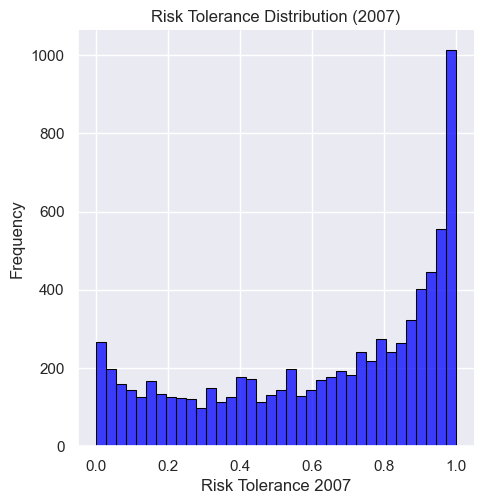

In [11]:
# Plot Risk Tolerance Distributions for 2007
sns.set()
sns.displot(dataset2['Risk_Tolerance_2007'], 
            kde=False, 
            bins=int(180/5),  
            color='blue', 
            edgecolor='black')  
plt.xlabel('Risk Tolerance 2007')
plt.ylabel('Frequency')
plt.title('Risk Tolerance Distribution (2007)')
plt.show()
plt.show()

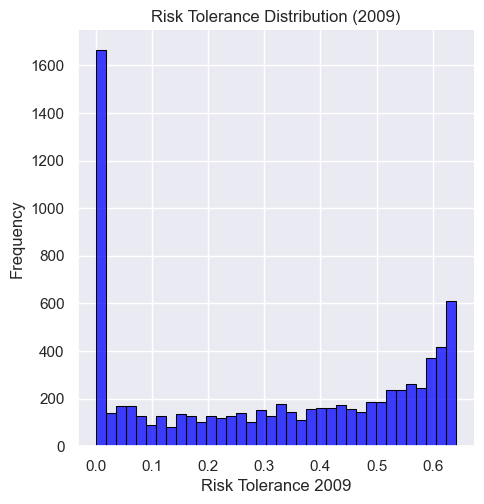

In [12]:
# Plot Risk Tolerance Distributions for 2009
sns.displot(dataset2['Risk_Tolerance_2009'], 
            kde=False, 
            bins=int(180/5),  
            color='blue', 
            edgecolor='black')  
plt.xlabel('Risk Tolerance 2009')
plt.ylabel('Frequency')
plt.title('Risk Tolerance Distribution (2009)')
plt.show()

1. From the graph, we can see that in 2007, a significant number of individuals had a risk tolerance close to 1.0, indicating that their investments were more skewed towards risky assets rather than risk-free assets.
2. After the financial crisis in 2009, investor behavior reversed significantly, with the majority shifting their investments to risk-free assets.
3. In 2009, the number of individuals with a risk tolerance close to 0.0 increased significantly, reflecting a more conservative investment approach.
4. The highest risk tolerance observed in 2009 was only around 0.7-0.8, with no individuals reaching 1.0, highlighting a reduced appetite for risk.
5. Overall, risk tolerance decreased in 2009, indicating a shift towards safer investment choices.

## Predict the true risk tolerance given the demographic, financial, and willingness to take risk features

In [13]:
# Calculate true risk tolerance (target variable)
intelligent_investors = intelligent_investors.copy()
intelligent_investors['true_risk_tolerance'] = (intelligent_investors['Risk_Tolerance_2007'] + intelligent_investors['Risk_Tolerance_2009']) / 2

# Select feature names and dependent variable
features_2007 = [
    "AGE07", "EDCL07", "MARRIED07", "KIDS07", "OCCAT107",
    "INCOME07", "RISK07", "NETWORTH07", "true_risk_tolerance"
]
final_dataset = intelligent_investors[features_2007]

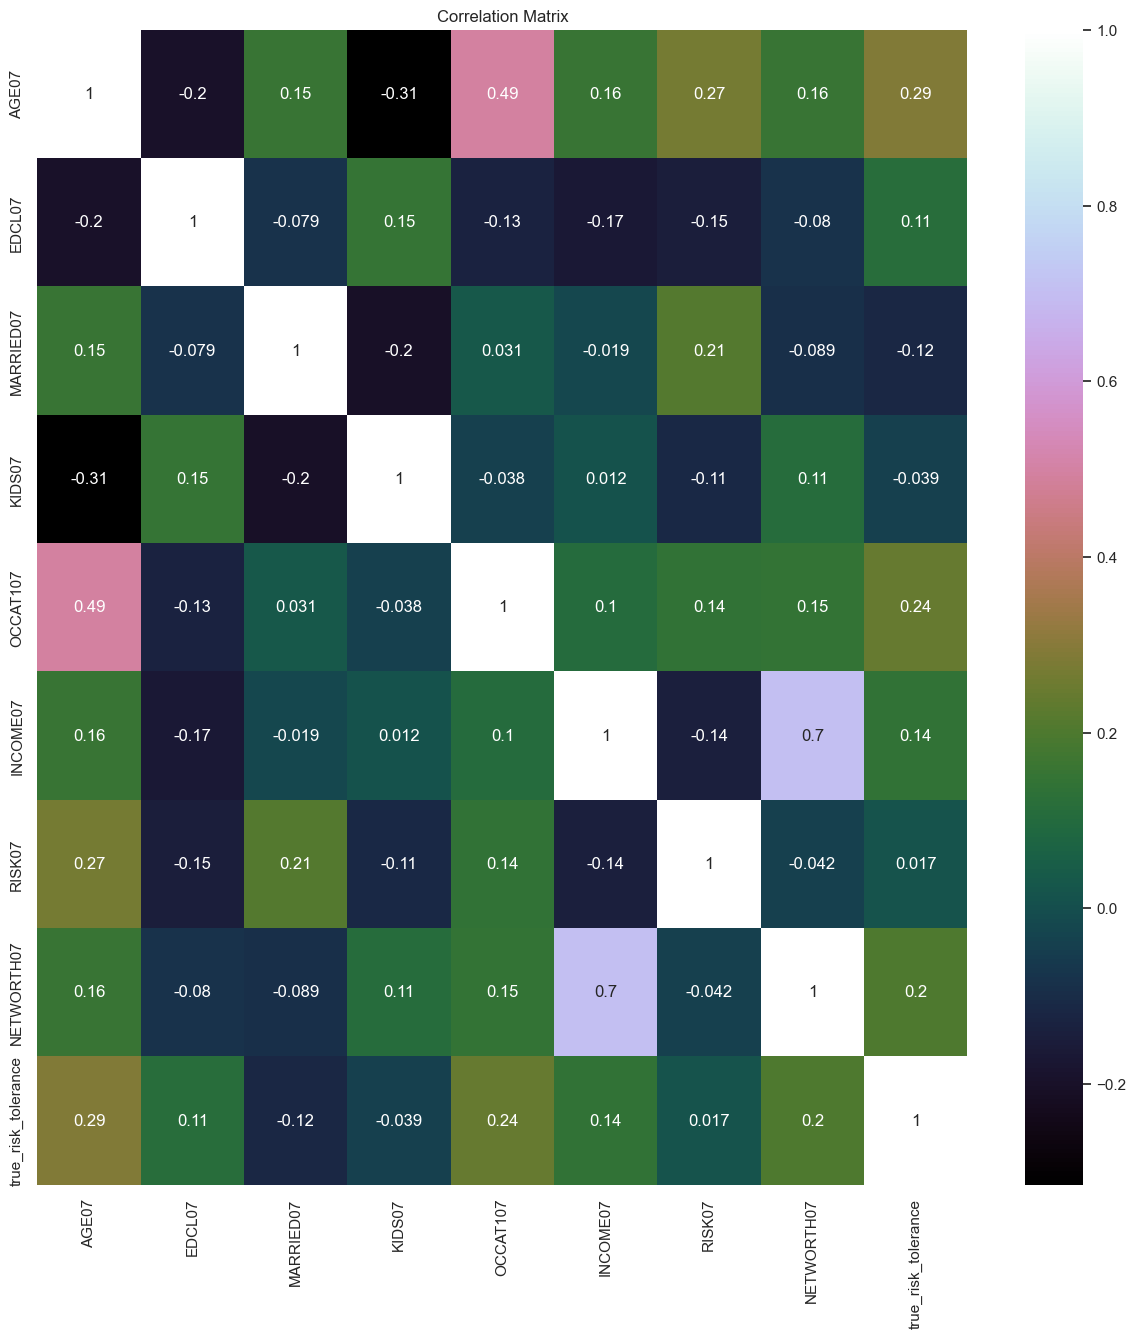

In [14]:
correlation = final_dataset.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, annot=True, cmap='cubehelix')
plt.title('Correlation Matrix')
plt.show()

1. Age (AGE07) shows a positive correlation (0.29) with true risk tolerance, implying that older individuals might have a  higher risk tolerance on average.
2. Education (EDCL07) also has a weak positive correlation of 0.11, suggesting that those with higher educational attainment may have a slightly increased tolerance for risk.
3. For Marital Status (MARRIED07), the correlation is -0.12, which is a weak negative correlation, suggesting that being married has slightly negative impact on true risk tolerance.
4. The number of children (KIDS07) has a weak negative correlation of -0.039, implying that having more children might be associated with a slightly lower risk tolerance.
5. The occupation category (OCCAT107) shows a positive correlation of 0.24, meaning that individuals in different occupational roles have  variations in their risk tolerance.
6. Income (INCOME07) has a weak positive correlation of 0.14, indicating that higher income categories might have a slightly higher risk tolerance.
7. Risk Willingness (RISK07) shows a weak positive relationship(0.017) with true risk tolerance. This suggests that self-reported willingness to take risks does not strongly align with actual risk tolerance.
8. Net Worth (NETWORTH07) has a positive correlation (0.2) with true risk tolerance, suggesting that individuals with higher net worth tend to have a higher tolerance for risk.

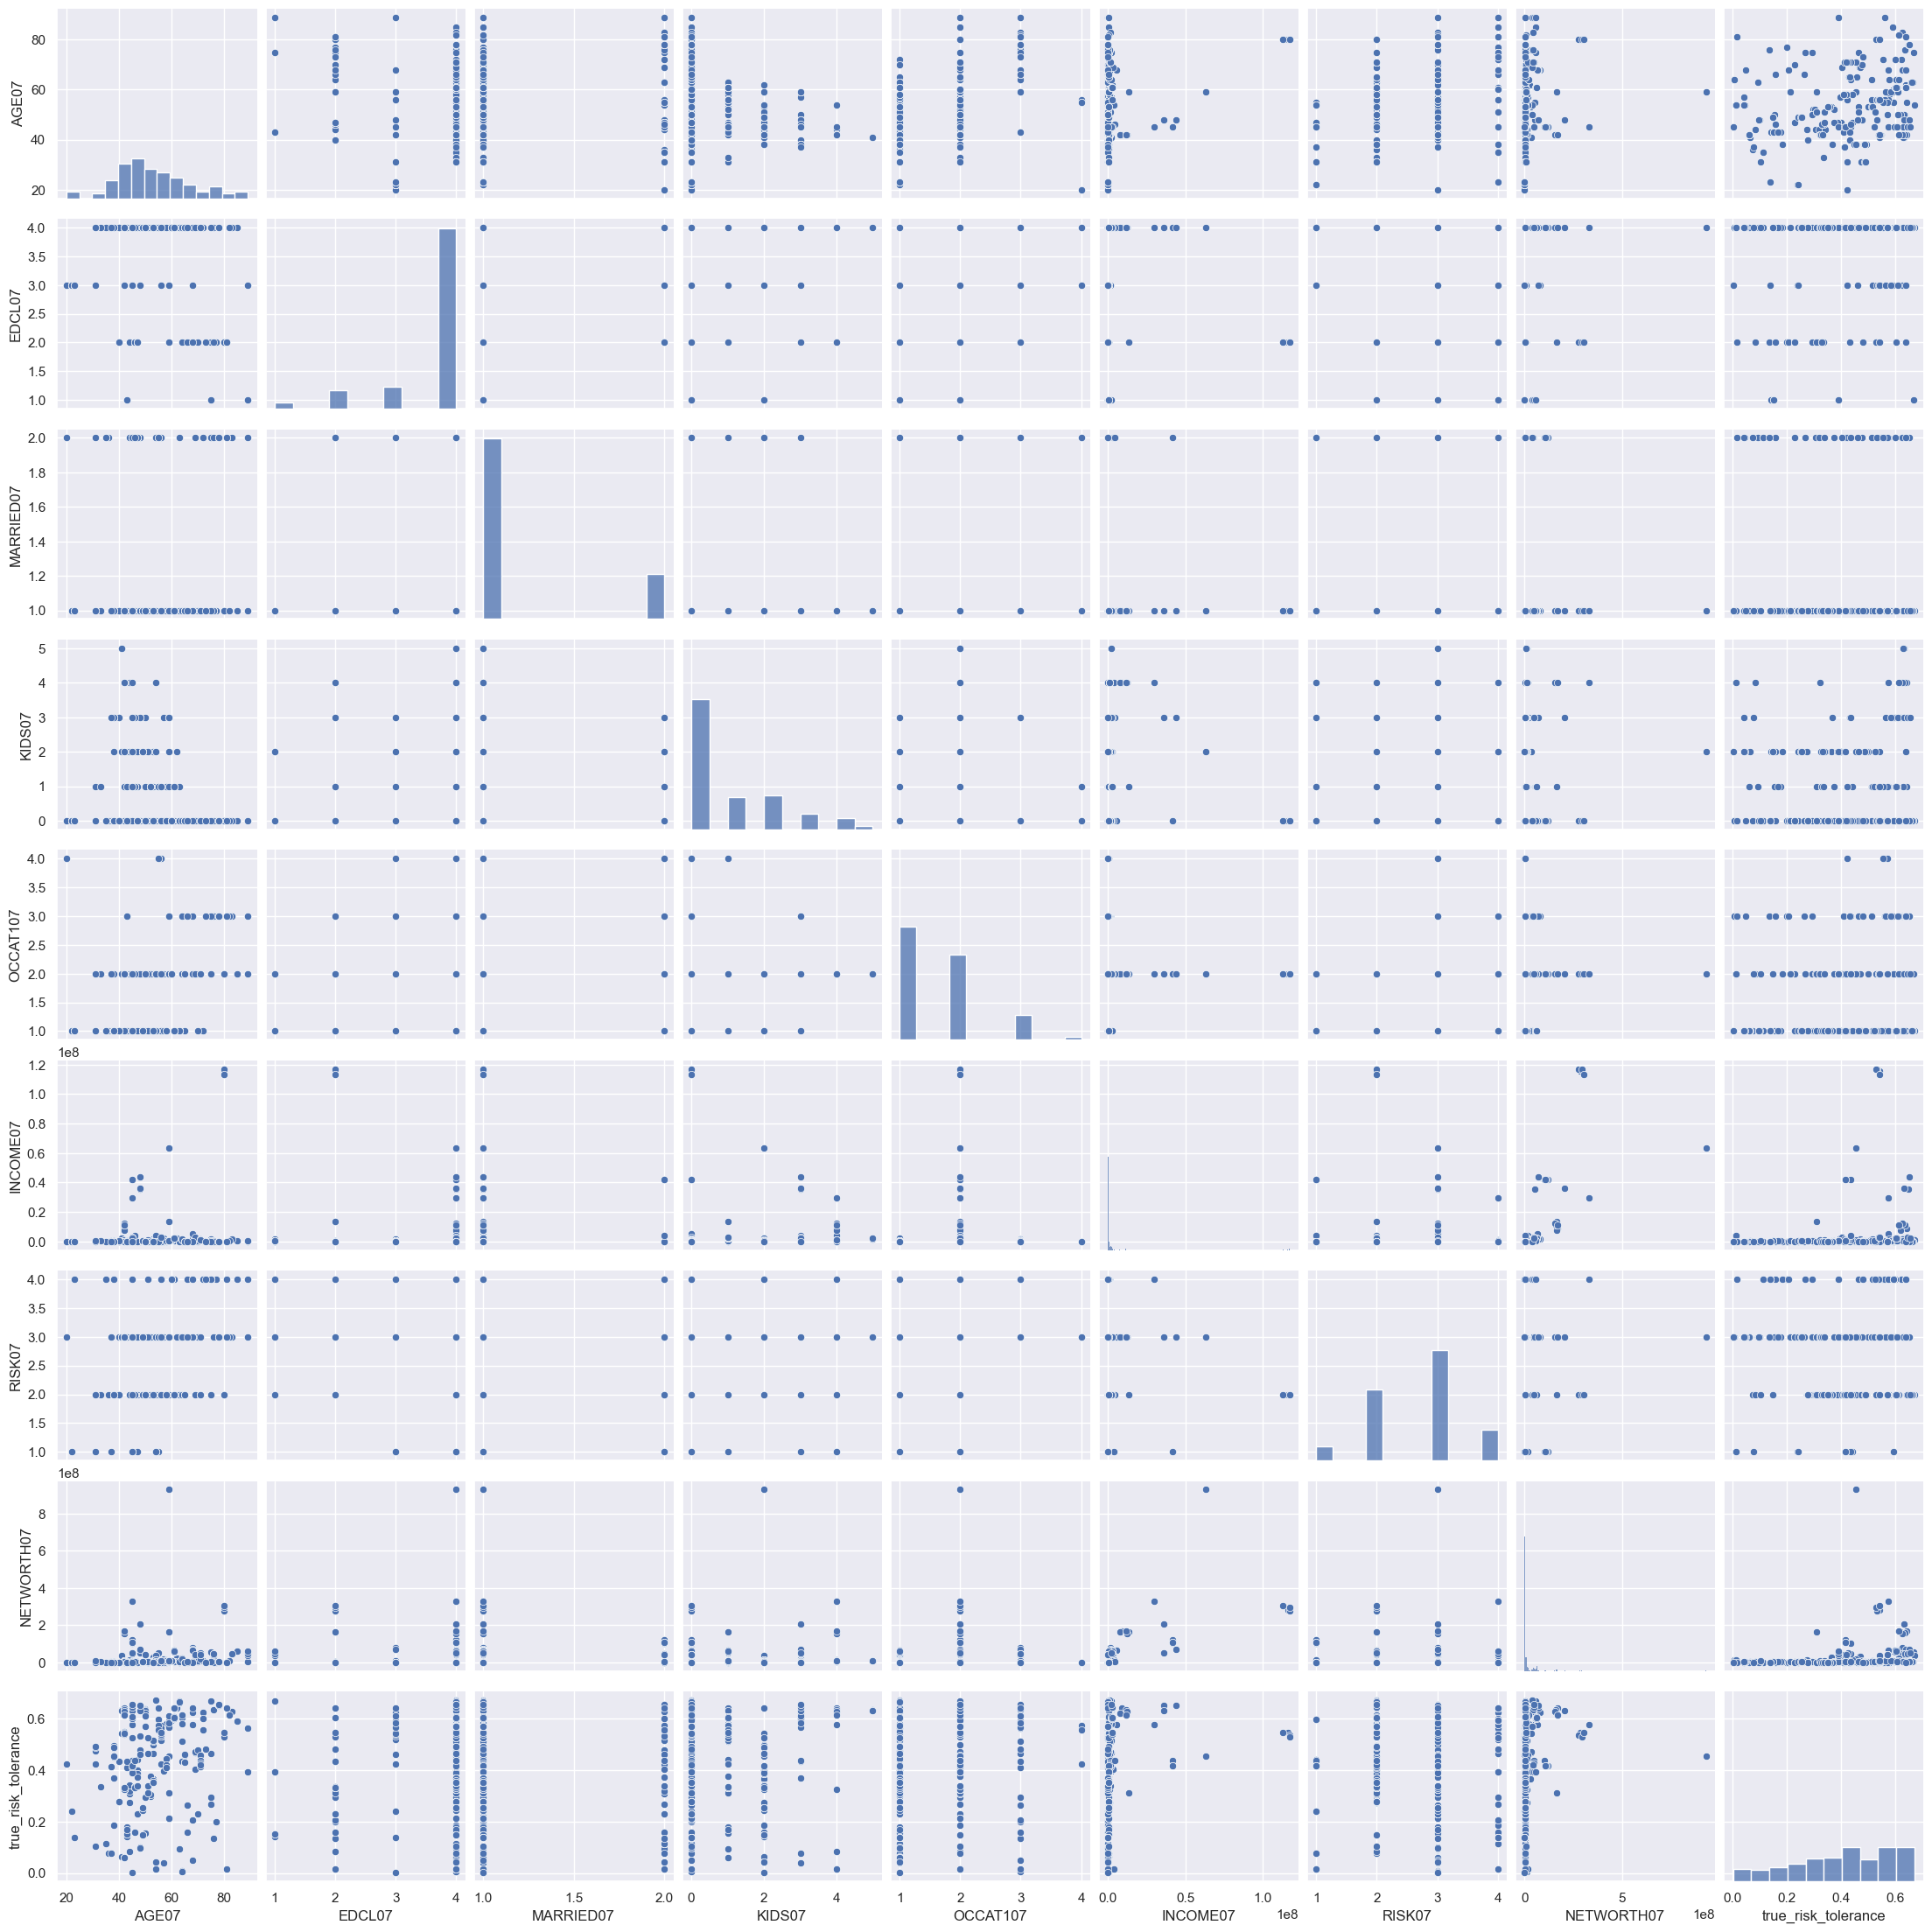

In [15]:
# Plot Pair Plot
sns.pairplot(final_dataset, diag_kind='hist')
plt.show()

* This chart illustrates the relationships between various factors and investors' true risk tolerance, as well as the distribution of each variable. The histograms show that some variables, such as age  and occupation category have noticeable skewed distributions, indicating that certain groups dominate the dataset. The scatter plots suggest a positive correlation between factors like age, net worth and income with true risk tolerance, while other variables, such as marital status and the number of children, appear to have a more scattered distribution with no clear linear trend. Additionally, clusters of data points in the scatter plots may reflect specific investment behavior patterns among certain groups. 

In [16]:
from pickle import dump
from pickle import load

In [17]:
dump(dataset, open('build_lab2a.sav', 'wb'))